<h2 align="center"> <b>NLP- Sequential Models</b> </h2>

<h4 align="center"> <b>Neural Networks for Sentiment Analysis</h4>


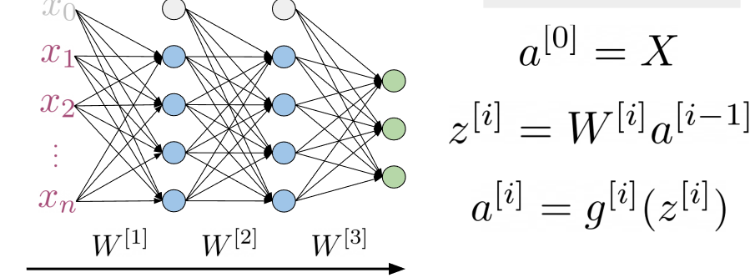

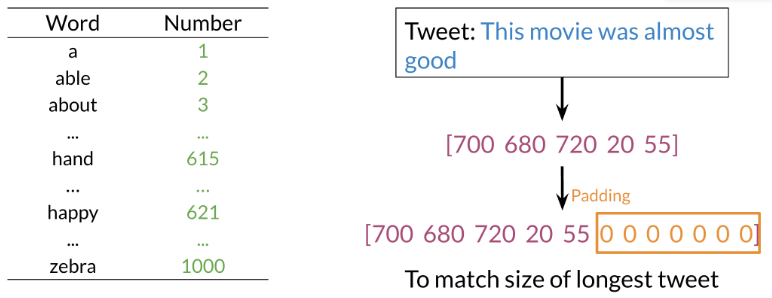

One of the Deep-Learning (NLP) Framework built on top of Tensorflow is **Trax**. It has several advantages:<br>
1. It supports parallel computing
2. Runs fast on CPU,GPU and TPU
3. Records algebriac computation for gradient evaluation.<br>
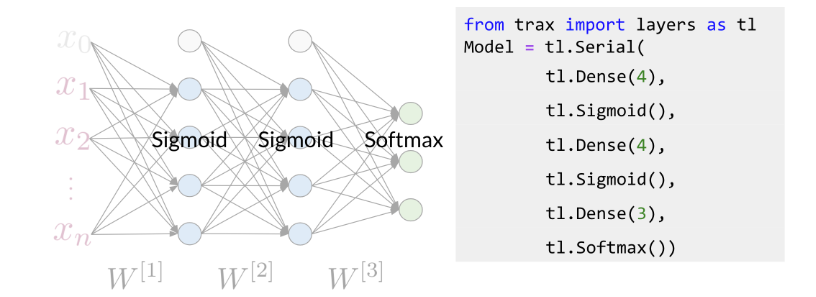 <br>
For more :<br>
- https://trax-ml.readthedocs.io/en/latest/
- https://github.com/google/trax

<h4 align="center"> <b>Embedding and Mean Layers</h4>


An Embedding layer creates index for each word in the Vocabulary and creates determined dimensions(here 2) of vectors.Every value that the embedding layer has created are Trainable in Trax.<br>
<u>The size of the weight matrix = Size of Vocabulary*Size of Embedding Layers</u>

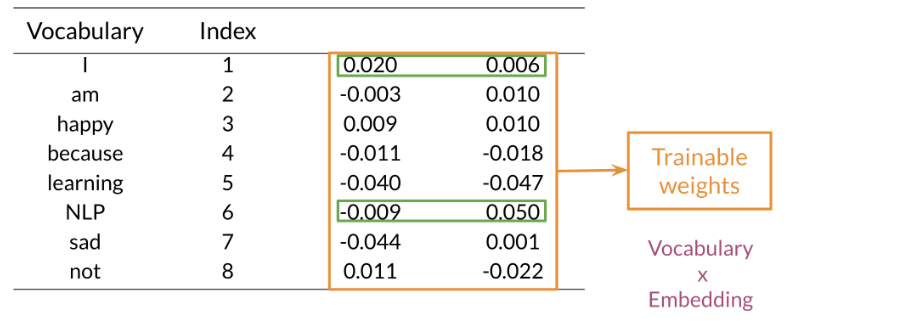

For the tweet "I am happy", we of embedding size 2 we get the size of the trainable weights = 3*2 but if there are padding layers present so the size of the trainable weights will increase to a large extent and we will end up with a lot of parameters to train. <br>
To counter this problem we take the mean of each embedding vectors and carry that forward to the sequential layers. The mean layer do not contain any trainable parameter.

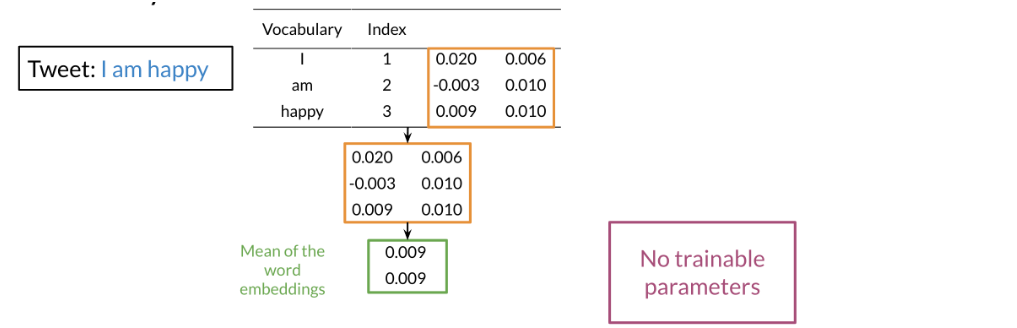

<h4 align="center"> <b>Gradient in Trax</h4>


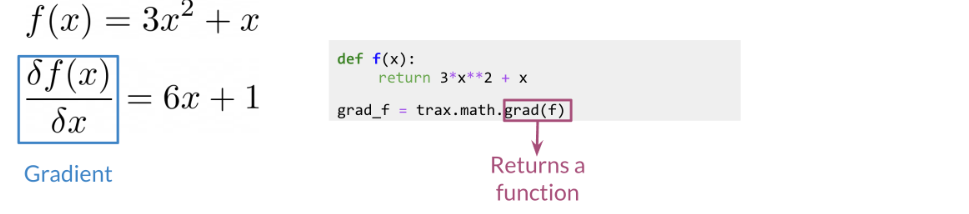

For the Neural Networks:<br>
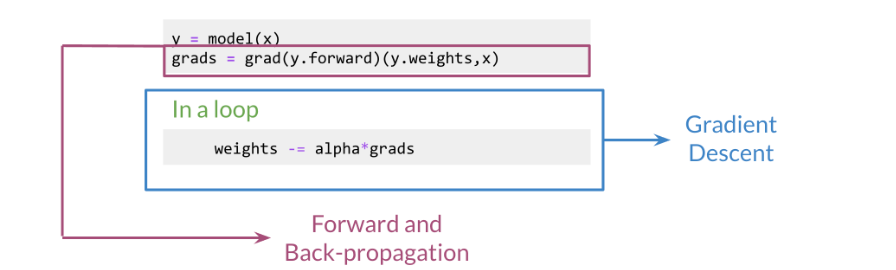

<h4 align="center"> <b>Recurrent Neural Network</h4>


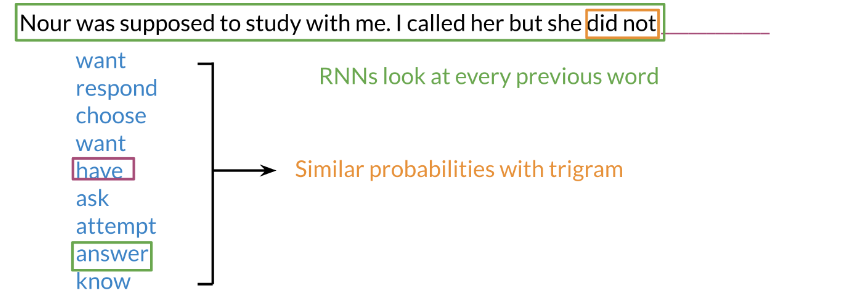

An N-gram (trigram) would only look at "did not" and would try to complete the sentence from there. As a result, the model will not be able to see the beginning of the sentence "I called her but she". Probably the most likely word is have after "did not". RNNs help us solve this problem by being able to track dependencies that are much further apart from each other. As the RNN makes its way through a text corpus, it picks up some information as follows<br>
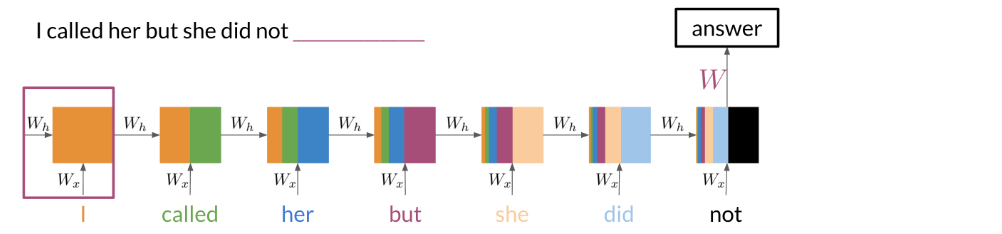<br>
Note that as you feed in more information into the model, the previous word's retention gets weaker, but it is still there. Look at the orange rectangle above and see how it becomes smaller as you make your way through the text. This shows that your model is capable of capturing dependencies and remembers a previous word although it is at the beginning of a sentence or paragraph. Another advantage of RNNs is that a lot of the computation shares parameters

- RNN propagates informaion from the start of a sentence through to the end.
- Then it propagates some of the computed information , takes the 2nd element in the sequence and generate new values(computed information).
- Then again it propagates some of the computed information from the first and second steps, and takes the 3rd element in the sequence and computes new information....and the process goes on till the last element in the sentence.
- In RNN the information from each word in the sequence is multiplied by the same weight $W_{x}$ and the information propagated from first element of sequence through to the last element of the sequence is multiplied by $W_{h}$
- So in RNN the learning parameters are $W_{x}$,$W_{h}$ and $W_{}$, weights used to predict the final word.
- An RNN would have the same number of parameters for word sequences of different lengths

**Applications of RNN**
- One to One: given some scores of a championship, you can predict the winner
- One to many : Picture to caption generation. To describe a picture multiple words are used
- Many to one : Sentiment analysis. To describe the sentiment of a person a tweet consisting multiple words are used.
- Many to Many : Machine Translation. English to Bengali translation is one of the example. Multiple words taken as input , in output also we get multiple words.Encoders and decoders are used in this usecase.


<h4 align="center"> <b>Mathematical Interpretation behind RNN</h4>


Here our point of focus will be to understand how RNN propagate information from the first word to the last word of the sequence through Time and How they make predictions.Hidden states propagates information through Time.<br>
Each Neuron of an RNN has 2 inputs -
1. Output of the previous hidden state $h_{}^{<t-1>}$
2. Value of input at time t, can be a word at time t denoted by $x_{}^{<t>}$
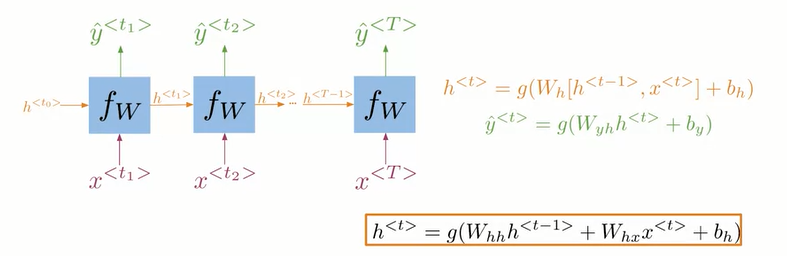<br>
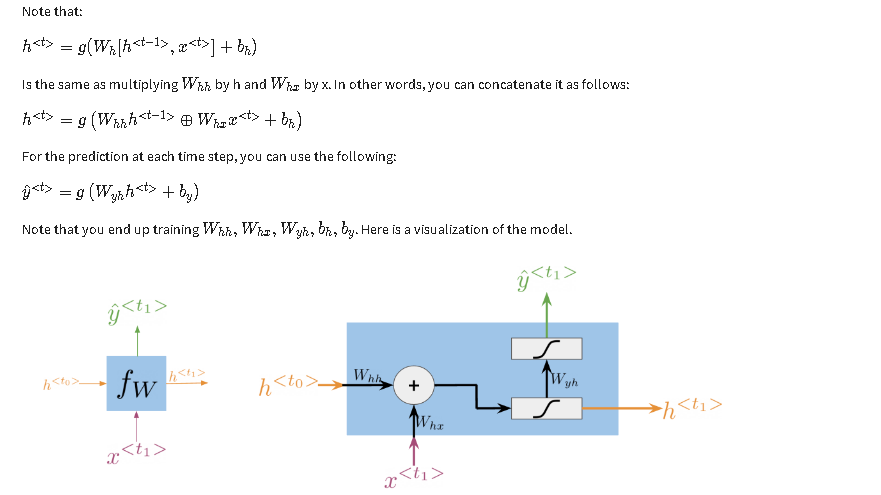

<h4 align="center"> <b>Cost function for RNN</h4>


***Cross Entropy Loss=Log Loss = Loss of one single training Example= <br>$J_{}^{t}=-\sum_{k=1}^{N}y_{k}log\widehat{y}_{k}$***<br>
Where N = Number of output classes<br>
Mean of the Loss for each batch of input to the model in each epoch =Time Average of the losses=<br>$J_{T}=\frac{1}{T}\sum_{t=1}^{T}J_{}^{t}=-\frac{1}{T}\sum_{t=1}^{T}\sum_{k=1}^{N}y_{k}^{<t>}log\widehat{y}_{k}^{<t>}$<br>
 y= actual value of centre word <br>
 $\widehat{y}$= Predicted value of y<br>
 NOTE : we are simply summing over all the time steps and dividing by T, to get the average cost in each time step. Hence, we are just taking an average through time

<h4 align="center"> <b>Implementation Note</h4>


Scan function in Tensorflow is used to carry forward forward propagation using abstraction.Tensorflow need this type of function to perform parallel computation and run on GPU. It takes the initializer, and returns a list of outputs (ys), and uses the current value, to get the next y and the next current value<br>
***tf.scan() function***<br>
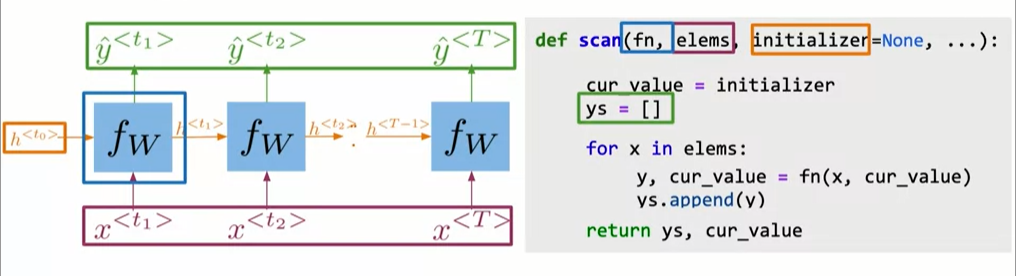

<h4 align="center"> <b>Gated Recurrent Unit (GRU)</h4>


Gated recurrent units are very similar to vanilla RNNs, except that they have a "relevance" and "update" gate that allow the model to update and get relevant information<br>
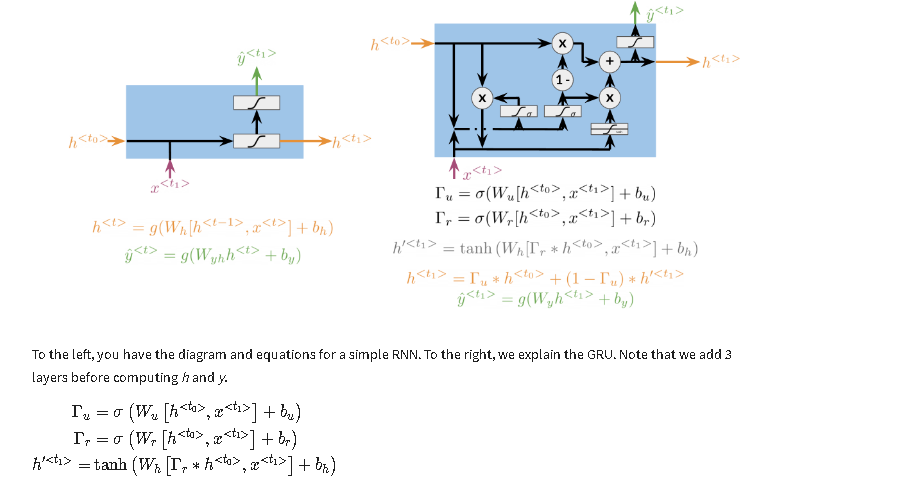

<br>The first gate  $\Gamma_{u}$ allows you to decide how much you want to update the weights by. The second gate  $\Gamma_{r}$, helps you find a relevance score. You can compute the new hh by using the relevance gate. Finally you can compute h, using the update gate. GRUs “decide” how to update the hidden state. GRUs help preserve important information.



<h4 align="center"> <b>Bi-directional RNN</h4>


Bi-directional RNNs are important, because knowing what is next in the sentence could give you more context about the sentence itself.<br>
here, Information flows from the past and from the future independently.<br>
Here, $\widehat{y}^{<t>}=g(W_{y}[\overrightarrow{h_{}^{<t>}},\overleftarrow{h_{}^{<t>}}]+b_{y})$

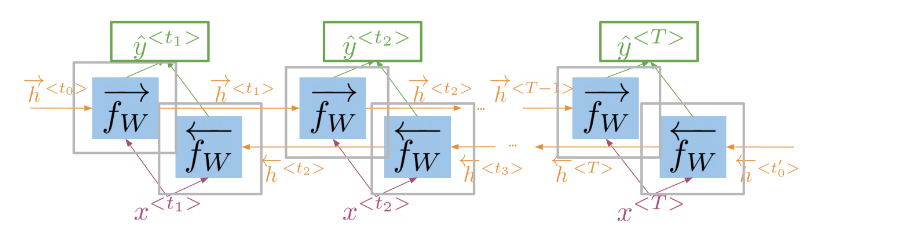

<h4 align="center"> <b>Deep RNN</h4>


Deep RNN are nothing but simple RNNs stacked together.<br>
Intermediate connections pass information through the values of activation in each timestamp just like a conventional DNN.<br>

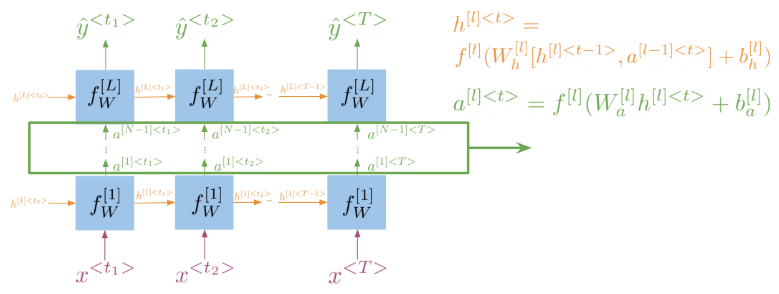

<br>
at layer l, you are using the input from the bottom $a_{}^{l-1}$and the hidden state $h_{}^{l}$ That allows you to get your new h, and then to get your new a, you will train another weight matrix Wa , which you will multiply by the corresponding h add the bias and then run it through an activation layer

<h4 align="center"> <b>Vanishing & Exploding gradients in RNN</h4>


> Advantages of RNN:
  - Consumes less RAM as compared to other N-Gram models
  - Captures dependencies with short range.

> Disadvantages:
  - Struggles to capture long term dependencies
  - Prone to Vanishing and Exploding gradient problems.

**Back-propagation through Time**<br>
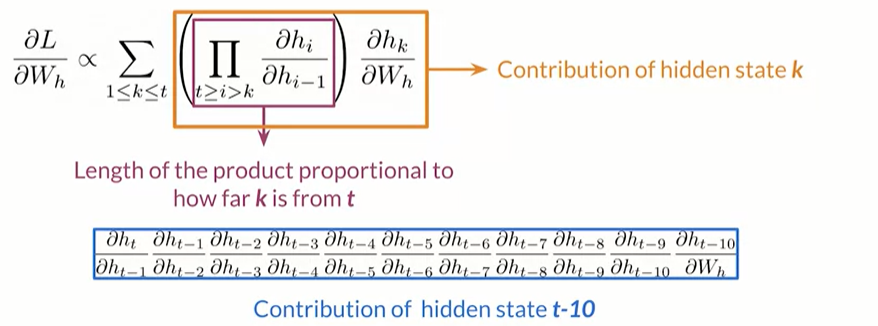

If the Partial Derrivative has value <1 then due to the multiplication of the terms the gradient value becomes very small and we face the vanishing gradient problem.<br>
Similarly, if the partial derrivative has values > 1 then we face the Exploding gradient problem.

**Countermeasures to tackle the problem**<br>
1. Identity RNN and ReLU activation : It's useful only for the vanishing gradient problems where the weights are initialized to the identity matrix and along with that ReLU activation function is used.
2. Gradient Clipping : This method is useful for the Expploding gradient issue where we can clip the values of the gradient passing a certain threshold to that given threshold. Say we can make all the gradient values greater than 100 to 100.
3. Skip-Connection : It enabled the RNN model to skip connection from its activation function to create a direct connect with the previous input (x).
In this way activations from earlier layers have more influence at the cost.<br>
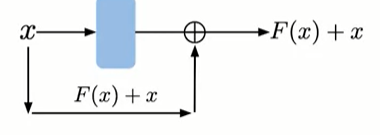

Reference Link : https://blog.paperspace.com/intro-to-optimization-in-deep-learning-gradient-descent/

<h4 align="center"> <b>Long Short-Term Memory (LSTM) </h4>


LSTM is a special variety of RNN which is able to remember only the relevant information and forget the irrelevant ones.<br>
Theere are multiple gates in LSTM unlike in GRU there are only 2.<br>
LSTM has a **cell-state** which works as a the memory of the RNN and a **hidden state** where the computations are performed.<br>
A typical LSTM has 3 gates : Forget Gate , Input Gate , Output Gate(In this order).The gates allow the gradients to flow unchanged.<br>
- Forget gate: tells you how much information to forget at any time point.  It makes use of the previous hidden state $h^{<t_0>}$ & the input $x^{<t_1>}$.It decides which informations to keep.
- Input gate: tells you how much information to input at any time point. It decides which informations to add.
- Output gate: tells you how much information to pass over at any time point.It decides what the next hidden state will be.<br>

***Equations***<br>
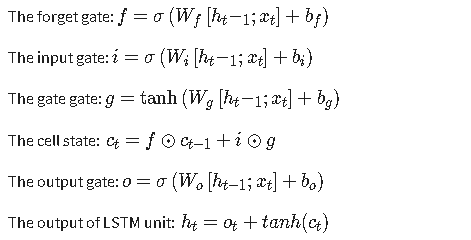<br>

**Applications of LSTM:**
  -  Speech Recognition
  - Next Character Prediction
  - Music Composition
  -  Chatbot
  - Image captioning

<h4 align="center"> <b>LSTM Architecture</h4>


***Gates in LSTM***<br>
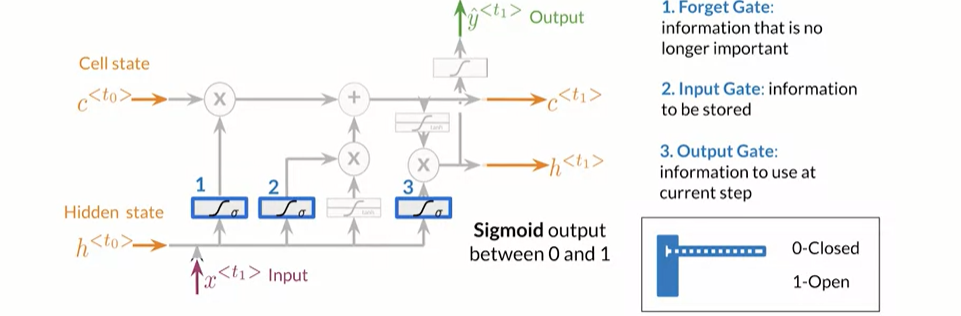

***Candidate Cell-State***<br>
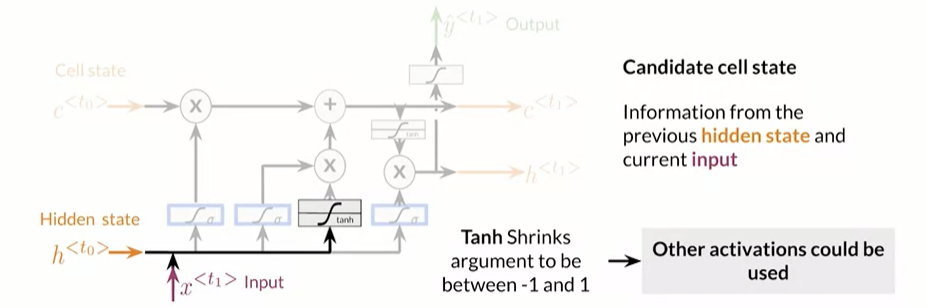

***New-Cell State***<br>
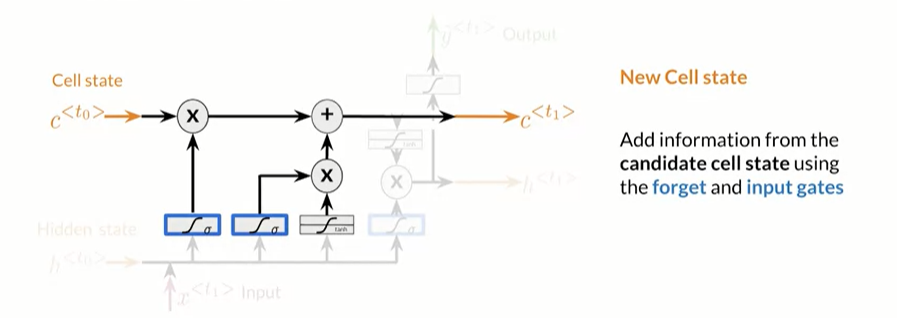

***New Hidden state***<br>
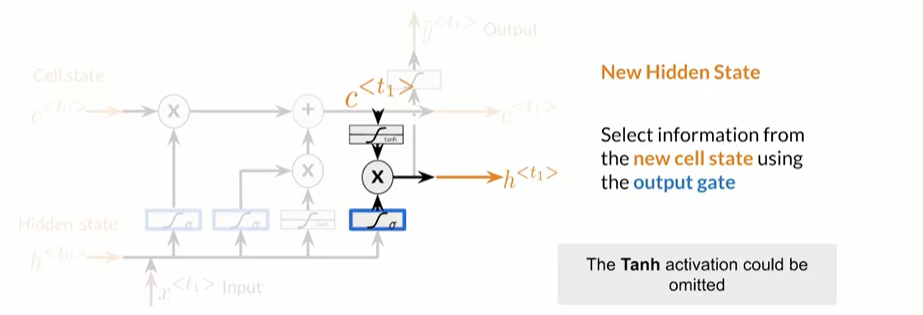

<h4 align="center"> <b>Named Entity Recognition use-case</h4>


NER systems are being used in search efficiency, recommendation engines, customer service, automatic trading, and many more.<br>
**Data Preprocessing**<br>
> 1. Assign each class a number.<br>For example A geographical indicator can be labeled as 1, a person can be labeled as 2, a time indicator can be labeled as 3 .....etc<br>
> 2. Assign each word a number.<br>
The whole sequence has to be labeled with a corresponding integer value.
> 3. Padding<br>
In LSTM all the sequences has to be of same size. To do that we can set the sequence length to a certain number and use \<PAD> token to fill the empty space.

**Training the NER**<br>
The training process goes though the following methods-<br>
1. Create a Tensor for each input and it's corresponding number.
2. Put them in a Batch
3. Feed it into LSTM unit
4. Run the output through a Dense Layer.
5. Predict using log Softmax over K classes.<br>
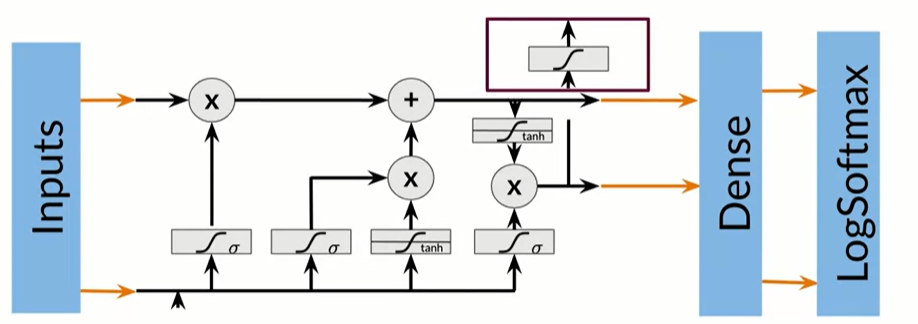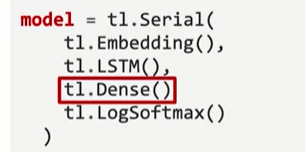


<h4 align="center"> <b>Model Evaluation</h4>


For evaluation of the LSTM model the following steps are to be performed:
- Pass the test set through the model.
- get argmax across the prediction array
- Mask the padded tokens
- Compare outputs against test labels.<br>
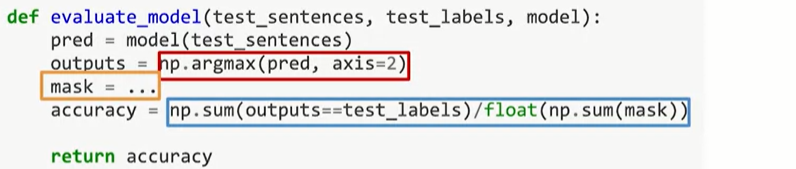

<h4 align="center"> <b>Siamese Networks</h4>


Siamese networks are useful to identify similar questions or any similar peice of text. <br>
Platforms like Stackoverflow or Quora uses this sort of algorithm to identify duplicate questions.

**Model Architecture**<br>
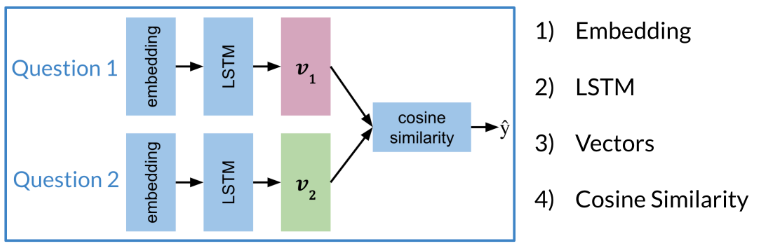

These two sub-networks are sister-networks which come together to produce a similarity score. Not all Siamese networks will be designed to contain LSTMs. <u>One thing to remember is that sub-networks share identical parameters. This means that you only need to train one set of weights and not two.</u><br>

The output of each sub-network is a vector. You can then run the output through a cosine similarity function to get the similarity score

<h4 align="center"> <b>Loss function in Siamese Networks</h4>


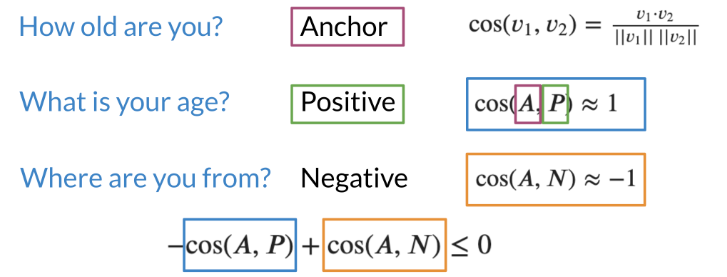

Note that when trying to compute the cost for a siamese network we use the triplet loss. The triplet loss usually consists of an Anchor and a Positive example. Note that the anchor and the positive example have a cosine similarity score that is very close to one. On the other hand, the anchor and the negative example have a cosine similarity score close to -1<br>
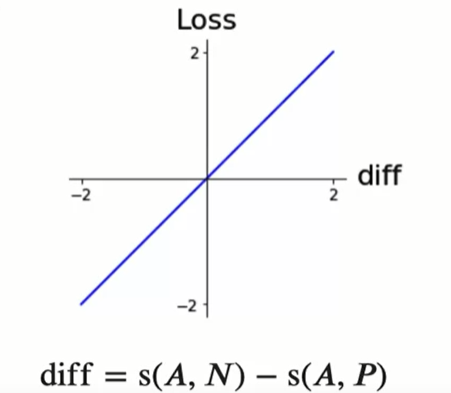

Note that if $\cos{(A,P)}$ =1 is 1 and $\cos{(A,N)}$=−1, then the equation is definitely less than 0. However, as cos(A,P) deviates from 1 and cos(A,N) deviates from -1, then you can end up getting a cost that is > 0. Here is a visualization that would help you understand what is going on<br>
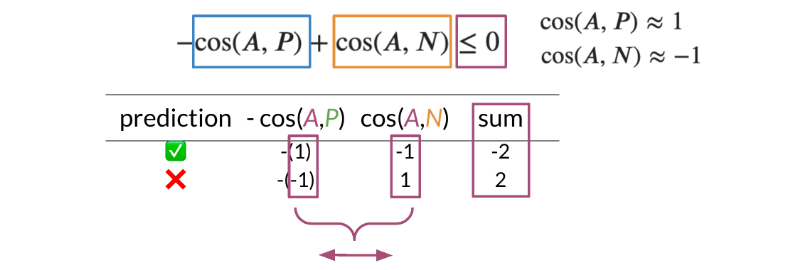

**Triplets**<br>
Q1 = How old are you ?<br>
Q2 = What's your age ? <br>
Q3 = Where have you been ? <br>
Here, lets take Q1 to be the **Anchor**. Then Q2 will be the **Positive Question** as Q1 and Q2 carry similar meanning and Q3 would be a **Negative Question** as Q1 and Q3 do not have similarity in meaning.<br>
The group of anchor, positive and negative questions grouped together are called **Triplet**.<br>
<br>The intuition is to increase the difference between the Anchor and the positive examples and the decrease the similarity between the Anchor and the Negative examples.<br>
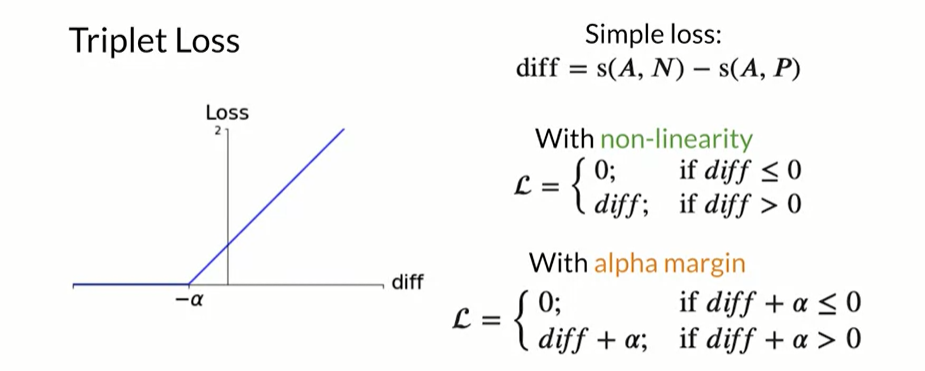<br>

Note that we added an \alphaα in the equation above. This allows you to have a margin of "safety".  When computing the full cost, we take the max of that the outcome of −cos(A,P)+cos(A,N)+α and 0. Note, we do not want to take a negative number as a cost<br>

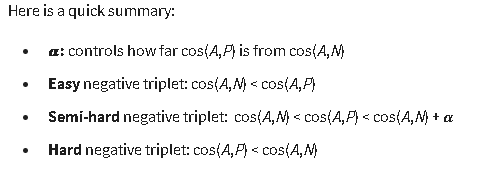


***Triplet Selection***<br>
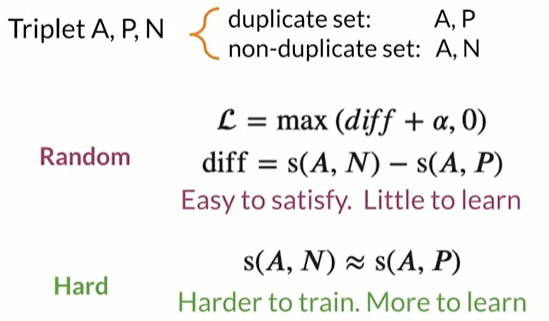<br>
Hard triplets imposes more challenges to learn the similarities between the anchor and the P and N sentences. So the more hard triplets we use to train the model the better will be the model performance eventually.

<h4 align="center"> <b>Cost Computation in Siamese Networks</h4>


d_model is a hyperparameter which is the dimension of the embedding layer of the model. d_layer determines the dimensions of the weights through each layers and thus determines the size of the output layer.<br>
The number of rows in the metrix v1 and v2 are the batch size.Here we have 4 questions in the batch so the number of rows is also 4.V1_1 and V2_1 are duplicate questions so they are represented in green and rest of the pairs are non-duplicates so they are represented by red.

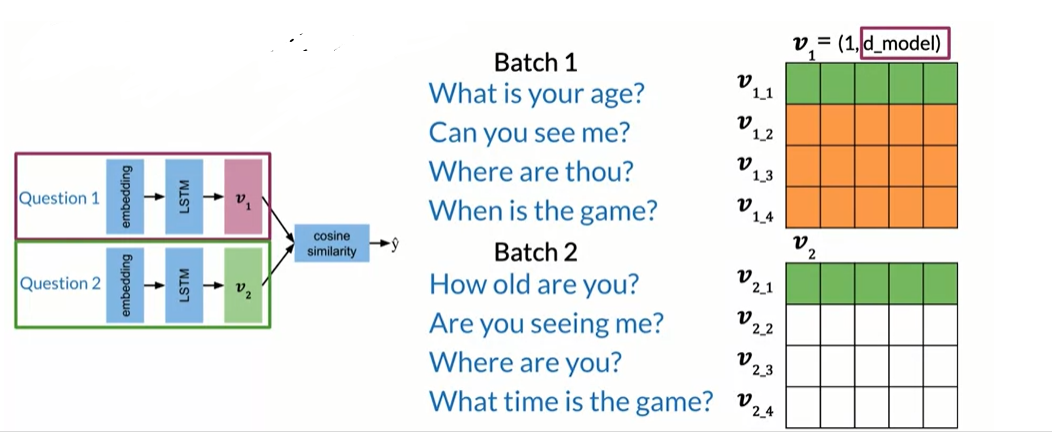

After we complete the step above we will have a matrix of dimension (batchsize*batchsize) where the diagonal elements will give us the similar questions and the off-diagonal elements will give us the questions that are not similar.If the model is performing good then the diaginal elements should have greater values than the off diagonal elements.<br>
It's not like the similarity between the duplicate questions i.e the values of the diagonal elements has to be greater than 0 all the time. It's that the values of the diagonal elements has to be greater than the off diagonal elements. If the value of a diagonal elemnt is -0.2 and the off diagonal elements have values <-0.2 then we can say that the model is performaing good.

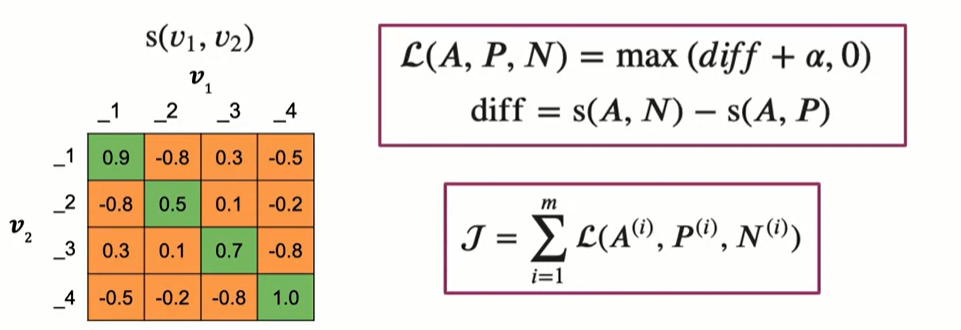

To increase the performance of the model we can perform the following:
1. Mean Negative:<br> Here we take the mean of the off diagonal element in each row. Example : For the first row the elements are [0.9,-0.8,0.3,-0.5] so among the off diagonal elements [-0.8,0.3,-0.5], the mean is -0.33. So here the dagonal element 0.9 is compared with the mean value -0.33 to figure out what differentiates the two questions in further iterations.This method helps the model to converge faster by reducing noise.As we are taking mean of the negatives here so the small noise of each of the negative examples cancels out.
2. Closest Negative:<br> Here we take the off-diagonal value which is sloses to the value of the diagonal element for a given row and the model try to figure out what exactly are those factors which differentiates the two questions.Example : For the first row the elements are [0.9,-0.8,0.3,-0.5] so among the off diagonal elements [-0.8,0.3,-0.5] , 0.3 is closest to the diagonal element 0.9.

For a Single Batch : <br>
$L_{Original}(A,P,N)=Cost_{Original}=max(s(A,N)-s(A,P)+α,0)=max(diff,0)$<br>
$L_{1}(A,P,N)=Cost_{1}=max(mean\_negative-s(A,P)+α,0)$<br>
$L_{2}(A,P,N)=Cost_{2}=max(closest\_negative-s(A,P)+α,0)$<br>
$L_{full}(A,P,N)=L_{1}+L_{2}$<br>
For all the m bathches <br>
$J=\sum_{i}^{m}L_{full}(A_{}^{(i)},(B_{}^{(i)},(C_{}^{(i)})$


<h4 align="center"> <b>One-Shot Learning</h4>


Imagine you are working in a bank and you need to verify the signature of a check. You can either build a classifier with K possible signatures as an output or you can build a classifier that tells you whether two signatures are the same.<br>
Lets assume we have built a Classification model where there were K classes. Now as we introduce a new signature so it becomes k+1 classes. Here we want the model to identify that signure everytime from only one training example without retraining the model for that one single new signature. <br>
Here,what we do is that, we compare the similarity score between the 2 signatures to check if the two signatures are same. So, here the problem-statement moved from a classification problem to a similarity problem.<br>
If $Similarity(Sign1,Sign2)>\tau ; Sign1 \ and  \ Sign2 \ are similar$<br>
If $Similarity(Sign1,Sign2)\leq \tau ; Sign1 \ and  \ Sign2 \ are \ NOT similar$

**Shortcomings of Sequence Models**<br>
Recurrent models typically take in a sequence in the order it is written and use that to output a sequence. Each element in the sequence is associated with its step in computation time tt. (i.e. if a word is in the third element, it will be computed at t3). These models generate a sequence of hidden states $h_{t}$, as a function of the previous hidden state $h_{t−1}$ and the input for position t. <br>The sequential nature of models you learned in the previous course (RNNs, LSTMs, GRUs) does not allow for parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across examples. In other words, if you rely on sequences and you need to know the beginning of a text before being able to compute something about the ending of it, then you can not use parallel computing.You would have to wait until the initial computations are complete. This is not good, because if your text is too long, then <br>
1) it will take a long time for you to process it and <br>
2) you will lose a good amount of information mentioned earlier in the text as you approach the end.  <br>

Therefore, attention mechanisms have become critical  for sequence modeling in various tasks, allowing modeling of dependencies without caring too much about their distance in the input or output sequences.